In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import time

170498071/170498071 [==============================] - 2s 0us/step
[7]


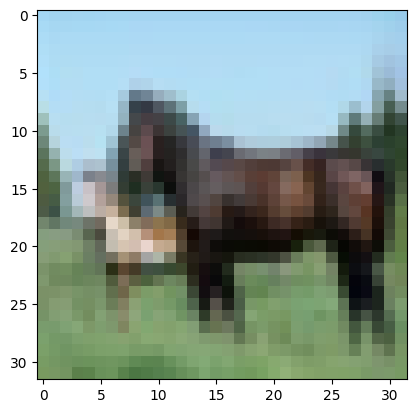

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print(train_labels[12])
plt.imshow(train_images[12])
plt.show()

train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255, train_labels.reshape(-1).astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128)

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255, test_labels.reshape(-1).astype(np.int32))).batch(128)

In [ ]:
#Add conv layers

inputs = tf.keras.layers.Input((32, 32, 3))

#7×7, 64, stride 1
conv_initial = tf.keras.layers.Conv2D(64, 7, activation=tf.nn.relu, name="conv_initial",strides = 1, padding="same")(inputs)
conv_initial = tf.keras.layers.BatchNormalization()(conv_initial)

#3×3 max pool, stride 1
x = tf.keras.layers.MaxPool2D(3,strides=1)(conv_initial)
f=64
r = 0

#Loops for each block
for loop in range(1,5):
  #Loops for repeatation of each layer
  previous_output = x
  for inner_loop in range(1,5):
    s = 1
    if loop > 1:
      if (inner_loop == 1):
        s = 2
    x = tf.keras.layers.Conv2D(f, 3, activation=tf.nn.relu, name="block"+str(loop)+"_conv"+str(inner_loop),strides = s,padding="same")(x)
    # print("block = ",loop,"\t Inner = ",inner_loop, " stride=",s)
    x = tf.keras.layers.BatchNormalization()(x)

  if loop > 1:
    # print("Downsampling")
    x1 = tf.keras.layers.Conv2D(f, 1, strides = 2, activation=tf.nn.relu, name="Downsampling_"+str(loop-1))(previous_output)
    x1 = tf.keras.layers.BatchNormalization()(x1)
    # print(x1.shape)
    x = tf.keras.layers.add([x,x1])
  else:
    x = tf.keras.layers.add([x,previous_output])
  f=f*2
  # print(x.shape)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='resnet')
model.summary()


Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv_initial (Conv2D)       (None, 32, 32, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 64)           256       ['conv_initial[0][0]']        
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)           0         ['batch_normalization[0][

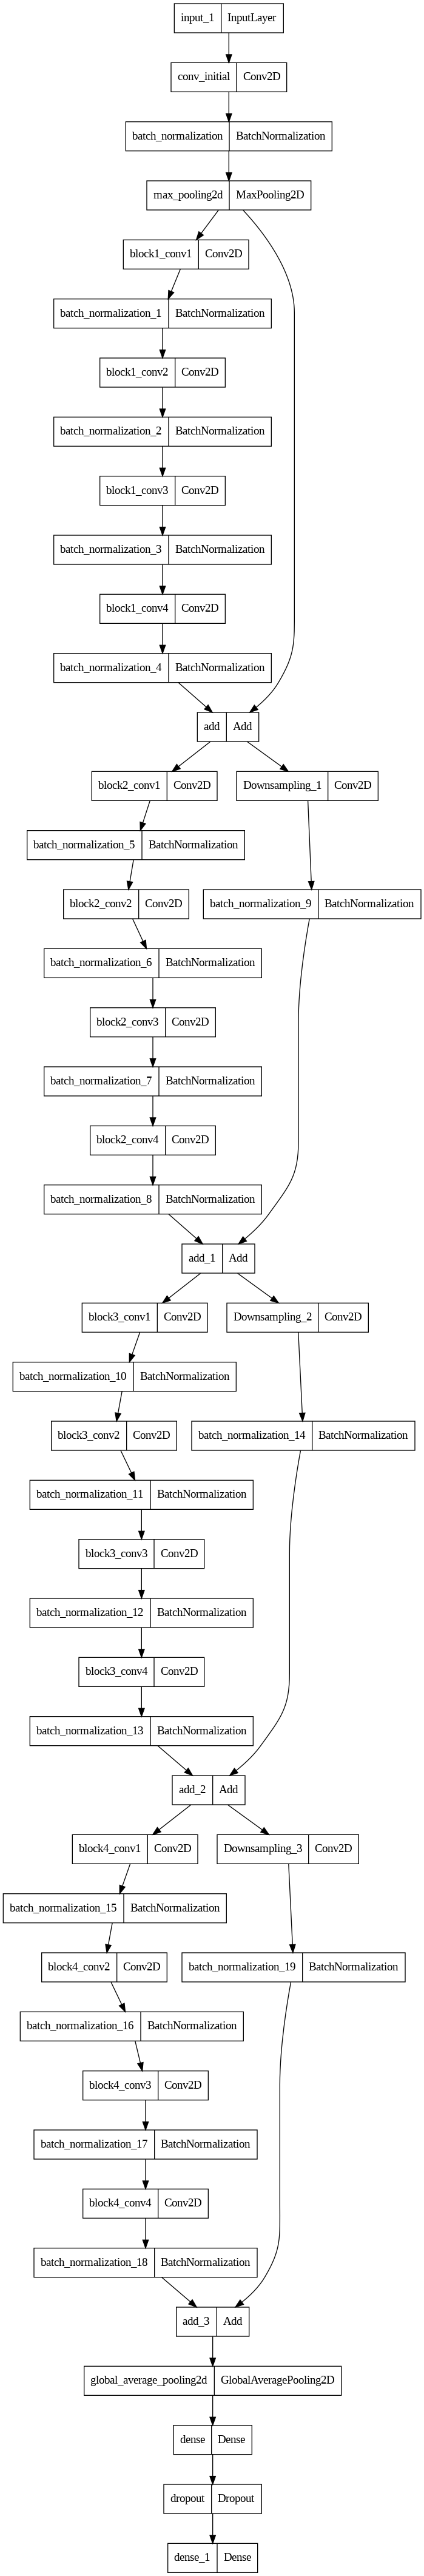

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,np.array(train_labels),
          epochs=20,validation_split=0.2,
         batch_size=128, shuffle=True)

Epoch 1/20
313/313 [==============================] - 58s 113ms/step - loss: 1.5921 - accuracy: 0.4402 - val_loss: 1.6219 - val_accuracy: 0.4396
Epoch 2/20
313/313 [==============================] - 34s 110ms/step - loss: 1.1336 - accuracy: 0.5976 - val_loss: 1.2356 - val_accuracy: 0.5642
Epoch 3/20
313/313 [==============================] - 35s 112ms/step - loss: 0.9483 - accuracy: 0.6671 - val_loss: 1.1613 - val_accuracy: 0.6135
Epoch 4/20
313/313 [==============================] - 35s 111ms/step - loss: 0.8106 - accuracy: 0.7163 - val_loss: 2.1427 - val_accuracy: 0.4234
Epoch 5/20
313/313 [==============================] - 35s 112ms/step - loss: 0.6854 - accuracy: 0.7620 - val_loss: 1.0168 - val_accuracy: 0.6557
Epoch 6/20
313/313 [==============================] - 35s 111ms/step - loss: 0.5752 - accuracy: 0.8010 - val_loss: 0.7653 - val_accuracy: 0.7468
Epoch 7/20
313/313 [==============================] - 34s 110ms/step - loss: 0.4838 - accuracy: 0.8303 - val_loss: 0.9561 - val_ac

In [ ]:
#Testing accuracy

print(model.evaluate(test_images,test_labels,verbose=2))

313/313 - 4s - loss: 1.1457 - accuracy: 0.7851 - 4s/epoch - 12ms/step
[1.1456712484359741, 0.785099983215332]
